# <h1><center> AI project 0 </h1>
#### <sh2><center> Sepehr Azardar</sh2>
# <h2><center> 810199357</h2>

In [16]:
# 1
import pandas as pd
df = pd.read_csv('train.csv')
smallDF = df.tail(5)
print(df.head(2))
print(df.tail(2))
print(df.columns)
print(df.info())
print(df.dtypes)
print(smallDF.isna())
print(smallDF.isna().sum())
print(smallDF.describe())
print(smallDF)

# print(df)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C  
     PassengerId  Survived  Pclass                   Name   Sex   Age  SibSp  \
889          890         1       1  Behr, Mr. Karl Howell  male  26.0      0   
890          891         0       3    Dooley, Mr. Patrick  male  32.0      0   

     Parch  Ticket   Fare Cabin Embarked  
889      0  111369  30.00  C148        C  
890      0  370376   7.75   NaN        Q  
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object'

head: for reading from top <br>
tail: for reading from bottom <br>
info: general information about the dataset types, etc <br>
describe: describe the dataset more specifically including some statistics

In [17]:
# 2
import pandas as pd
# df = pd.read_csv('train.csv')
print(df.dtypes)
print(df.Sex.head())
def converter(x):
    if x == "male":
      return 1
    if x == "female":
      return 0
    return -1
df['Sex'] = df['Sex'].apply(converter)
print(df.Sex.head())
print(df.Sex.value_counts())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object
0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64
1    577
0    314
Name: Sex, dtype: int64


In [18]:
# 3
import pandas as pd
import numpy as np
# df = pd.read_csv('train.csv')
print(df.isna().sum())
print(df.info())


# for embarked we fill the blanks with mean because the nan number is low 
# but for cabin wo delete the column
print(df['Embarked'].value_counts())
print(df['Embarked'].head())
df['Embarked'] = df['Embarked'].astype(pd.api.types.CategoricalDtype(categories=['S', 'C', 'Q']))
df['Embarked'] = df['Embarked'].cat.codes
print(df['Embarked'].head(), 'hello \n')
print(df['Embarked'].value_counts())
temp = df[df['Embarked'] != -1]['Embarked']
print(temp.__len__(), temp.mean(), temp.value_counts())
df['Embarked'].replace(-1, temp.mean().__round__(), inplace=True)


# df[df['Embarked'] == -1]['Embarked'] 
# Note when use boolean indexing the result will be a copy of the original data!!!!!!!!!!!!!!!!!!!!


# df['Embarked'][61] = temp.mean().round()
print(df['Embarked'].value_counts())

print('\n\n')

print(df['Age'].head())
print(df['Age'].dtype)
age_mean = df['Age'].dropna().mean()
print(age_mean)
df['Age'] = df['Age'].fillna(age_mean)
print(df['Age'].head())
print('\n\n')

df = df.drop(['Cabin'], axis=1)
print(df.dtypes)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB
Non

#### when we use mean to fill in the blanks, we dont decrease the size of data as it remains the same. on the other hand if we delete the data we lose all of it. ans may lead to some issues in the survey.



In [19]:
# 4
import pandas as pd
import numpy as np
# df = pd.read_csv('train.csv')
for i in df.columns: 
  print(i,":",df[i].duplicated().sum(),len(df[i]))
# drop passenger id because it is unique
df =df.drop(['PassengerId'], axis=1)
print(df.info())


PassengerId : 0 891
Survived : 889 891
Pclass : 888 891
Name : 0 891
Sex : 889 891
Age : 802 891
SibSp : 884 891
Parch : 884 891
Ticket : 210 891
Fare : 643 891
Embarked : 888 891
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    int8   
dtypes: float64(2), int64(5), int8(1), object(2)
memory usage: 63.6+ KB
None


In [20]:
# 5
import numpy as np
import pandas as pd

cur_df = pd.read_csv('train.csv')
print( "male: ", cur_df[cur_df['Sex'] == "male"].__len__())
print( "female: ", cur_df[cur_df['Sex'] == "female"].__len__())
cur_df['Embarked'] = cur_df['Embarked'].astype('category')
print(cur_df['Embarked'].cat.categories)
print(cur_df['Embarked'].isna().sum())
print( cur_df['Embarked'].value_counts())
cur_df['Embarked'] = cur_df['Embarked'].cat.codes
print( cur_df['Embarked'].value_counts())
print(cur_df[cur_df['Sex'] == "male"][cur_df[cur_df['Sex'] == "male"]['Embarked'] == 2].shape[0])
# print(df[df['Sex'] == "male"])
print(cur_df[(cur_df['Sex'] == "male") & (cur_df['Embarked'] == 2)].shape[0])

male:  577
female:  314
Index(['C', 'Q', 'S'], dtype='object')
2
S    644
C    168
Q     77
Name: Embarked, dtype: int64
 2    644
 0    168
 1     77
-1      2
Name: Embarked, dtype: int64
441
441


In [21]:
# 6
import pandas as pd
import numpy as np
# df = pd.read_csv('train.csv')
print(cur_df.info())
print(cur_df[(cur_df['SibSp'] == 0) & (cur_df['Pclass'] == 3) & (cur_df['Age'] > 35)].__len__())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int8   
dtypes: float64(2), int64(5), int8(1), object(4)
memory usage: 77.6+ KB
None
48


In [22]:
# 7 & 8
import pandas as pd
import numpy as np
# df = pd.read_csv('train.csv')


In [23]:
# 7 

# df = pd.read_csv('train.csv')
# print(df['Embarked'].unique())
print(df['Embarked'].value_counts())
print(df[df['Embarked'] == 1]['Fare'].mean())

0    646
1    168
2     77
Name: Embarked, dtype: int64
59.95414404761905


In [24]:
# 8

print(df.index.stop)
def cal_mean(df):
  fare_total = 0.0
  fare_count = 0
  for i in range(0, df.index.stop):
    if df["Embarked"][i] == 1:
      fare_total += df["Fare"][i]
      fare_count += 1
  return(fare_total / fare_count)

891


In [25]:
# 7 & 8
#compare the time of the two methods
import pandas as pd
import numpy as np
import time 
import timeit
# df = pd.read_csv('train.csv')
loopWay = %timeit -o cal_mean(df)
np_way = %timeit -o res = (df[df['Embarked'] == 1]['Fare'].mean())
print(loopWay.average / np_way.average)


6.83 ms ± 208 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
296 µs ± 20.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
23.1102467930544


<AxesSubplot:>

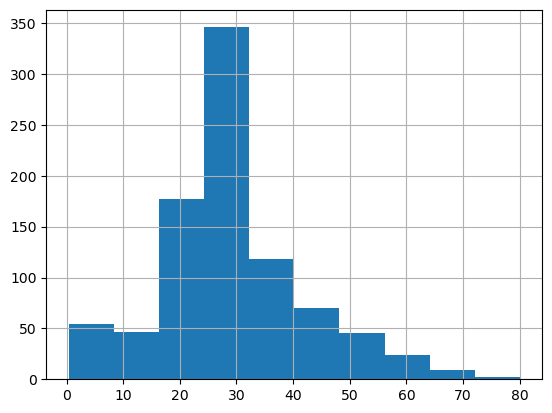

In [26]:
# 9 
import pandas as pd
import numpy as np
# df = pd.read_csv('train.csv')
df['Age'].hist()

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    int8   
dtypes: float64(2), int64(5), int8(1), object(2)
memory usage: 63.6+ KB
None
0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
Abbing, Mr. Anthony                        1
Nysveen, Mr. Johan Hansen                  1
Nicholson, Mr. Arthur Ernest  

<AxesSubplot:>

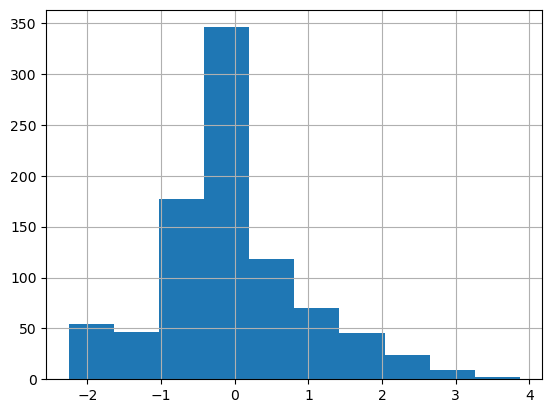

In [27]:
# 10
import pandas as pd
import numpy as np
# df = pd.read_csv('train.csv')
print(df.columns)
print(df.info())
cols = df.columns
ticket_cat = 0
for i in cols:
  if df[i].isna().sum() / df[i].__len__() > 0.5:
    df = df.drop([i], axis=1)
  else:
    if df[i].dtype == 'object':
      df[i] = df[i].astype('category')
      print(df[i].value_counts())
      if i == 'Ticket':
        ticket_cat = df[i].cat.categories
        print(ticket_cat,10*'*')
      df[i] = df[i].cat.codes
      print(df[i].value_counts())
      
    df[i] = df[i].fillna(df[i].mean())
    print(df[i].value_counts())

print(df.mean())
print(df.info())
df = (df - df.mean()) / df.std() # normalize
print(df.mean())
print(df.std())
df['Age'].hist()


-0.4286112954071324 1.0325921749662605 0.2670037577946076 0.880074579049853


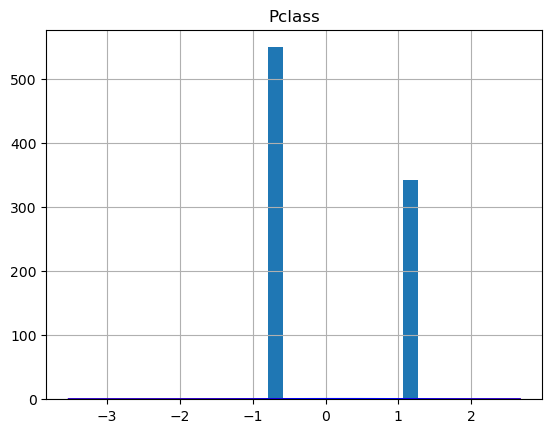

-0.6880342305256878 0.9762973077248485 0.42861148786846015 0.7426259299622611


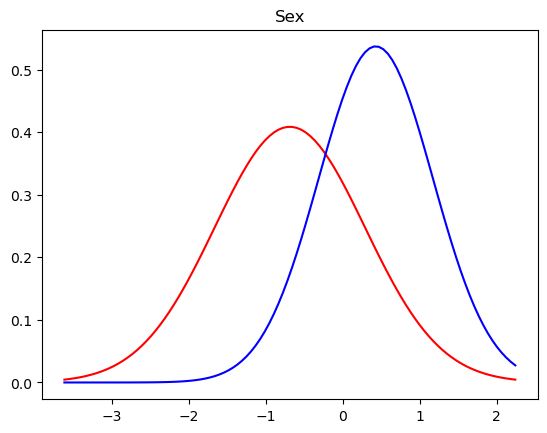

-0.08839702963777199 1.059258694165856 0.055067002069439104 0.9581107320082077


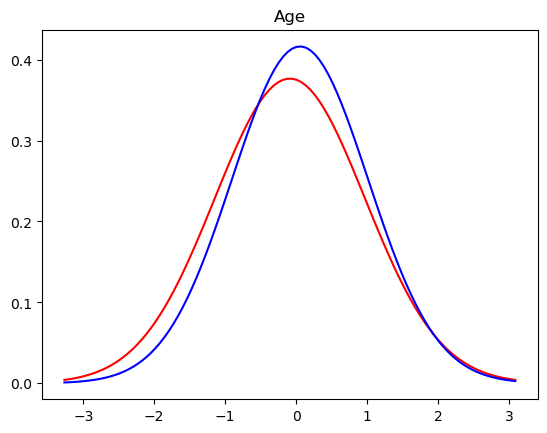

-0.044728124757263836 0.6426585716317933 0.027863421979935226 1.1683580266780003


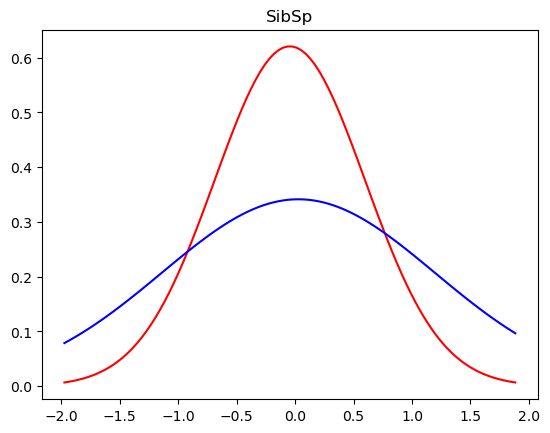

0.10336557205939723 0.957391107504523 -0.06439166784028012 1.0212252754556703


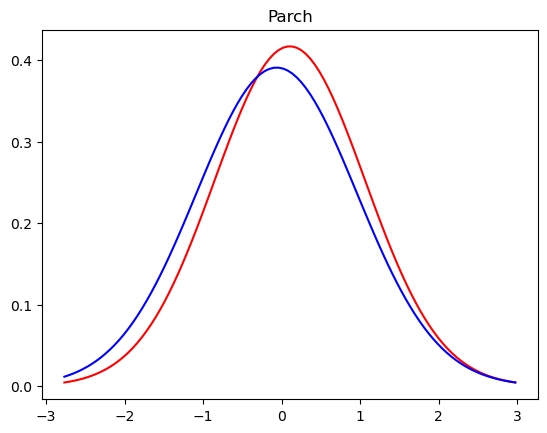

-0.20836504852519944 1.086207059586672 0.12980117776979652 0.9197494290509401


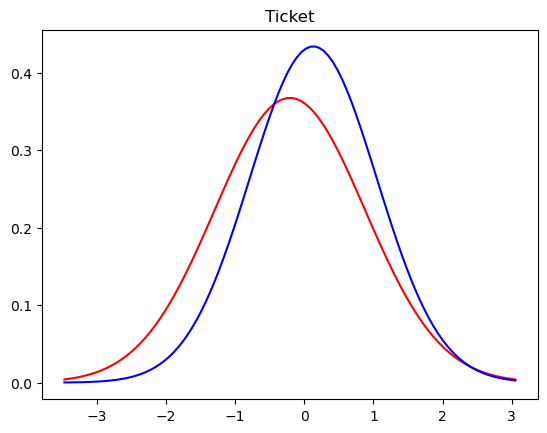

0.32582174526559243 1.340157038833758 -0.20297092328020377 0.6316369672336241


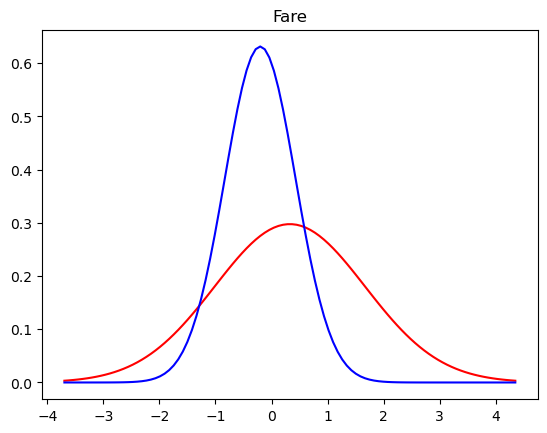

0.1352529729263878 1.0242399866198084 -0.08425595034758598 0.9760959096414734


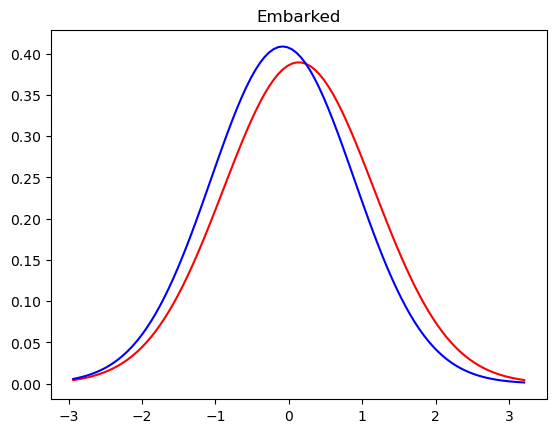

In [28]:
# 11
from scipy.stats import norm
import matplotlib.pyplot as plt

df['Survived'].hist()
survived = df[df['Survived'] > 1]
died = df[df['Survived'] < 1]
for column in df.columns:
    if column in ['Name', 'Survived']:
        continue
    sur_m = survived[column].mean()
    sur_std = survived[column].std()
    die_m = died[column].mean()
    die_std = died[column].std()
    print(sur_m, sur_std, die_m, die_std)

    x = np.linspace(sur_m - 3*sur_std, sur_m + 3*sur_std, 100)
    plt.plot(x, norm.pdf(x, sur_m, sur_std) , label='survived' , color = 'r')
    plt.plot(x , norm.pdf(x , die_m , die_std) , label='unsurvived' , color = 'b')
    plt.title(column)
    plt.show()
    


In [46]:
# 12
test = pd.read_csv('test.csv')
# df = pd.read_csv('train.csv')
print(test.info())
# function cal_p(feature):
age_mean = test['Age'].dropna().mean()
test['Age'] = test['Age'].fillna(age_mean)
test = test.drop(['Cabin'], axis=1)
age_mean = test['Fare'].dropna().mean()
print(test.Fare.head())
test['Fare'] = test['Fare'].fillna(age_mean)
print(test.Fare.head())
print(test.info())


def converter(x):
    if x == "male":
        return 1
    if x == "female":
        return 0
    return -1


test['Sex'] = test['Sex'].apply(converter)
test['Embarked'] = test['Embarked'].astype(
    pd.api.types.CategoricalDtype(categories=['S', 'C', 'Q']))
test.Embarked = test.Embarked.cat.codes
norm_test = (test - test.mean(numeric_only=True)) / test.std(numeric_only=True)
print(test.info())
points =  df['Survived'].value_counts()
# print(points.index, points.values)
points = points.index
sur_point = points[0] if points[0] > points[1] else points[1]
die_point = points[1] if points[0] > points[1] else points[0]
p_sur = norm.pdf(sur_point, df['Survived'].mean(), df['Survived'].std())
p_die = norm.pdf(die_point, df['Survived'].mean(), df['Survived'].std())
print('probs:', p_sur, p_die)
sur_df = df[df['Survived'] > 0]
die_df = df[df['Survived'] < 0]
print(norm_test.SibSp.value_counts())
for feature in ['Pclass' , 'Sex' , 'Age' , 'Fare' , 'SibSp' , 'Parch' , 'Embarked']:
    sur_m = sur_df[feature].mean()
    sur_std = sur_df[feature].std()
    die_m = die_df[feature].mean()
    die_std = die_df[feature].std()
    print(sur_m, sur_std, die_m, die_std)
    p_f_sur = p_sur * norm.pdf(norm_test[feature], sur_m, sur_std)
    p_f_die = p_die * norm.pdf(norm_test[feature], die_m, die_std)
    result = p_f_sur > p_f_die
    print('feature:', feature, 'cal:', result.sum()/len(result)*100, '%')
    if feature == 'Sex':
      test['survived'] = np.where(result, 1, 0)
      test['survived'].to_csv('result.csv')
      test.to_csv('testPre.csv', index=False)
print('\n\n\n')
for feature in ['Pclass' , 'Sex' , 'Age' , 'Fare' , 'SibSp' , 'Parch' , 'Embarked']:
    sur_m = sur_df[feature].mean()
    sur_std = sur_df[feature].std()
    die_m = die_df[feature].mean()
    die_std = die_df[feature].std()
    print(sur_m, sur_std, die_m, die_std)
    p_f_sur = p_sur * norm.pdf(df[feature], sur_m, sur_std)
    p_f_die = p_die * norm.pdf(df[feature], die_m, die_std)
    result = p_f_sur > p_f_die
    print('\nfeature:', feature, 'cal:', result.sum()/len(result)*100, '%')
    print('feature:', feature, 'corolation', ((df['Survived'] > 0) == result).sum() / len(result) * 100, '%\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
0     7.8292
1     7.0000
2     9.6875
3     8.6625
4    12.2875
Name: Fare, dtype: float64
0     7.8292
1     7.0000
2     9.6875
3     8.6625
4    12.2875
Name: Fare, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 co